# NLTK Chapter 2

## 1.3 brown corpus
- The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University
- contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on
- The Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as stylistics.
- 



In [5]:
import nltk
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [6]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
     print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

## 1.6 Annotated text corpora
 - Many text corpora contain linguistic annotations, representing POS tags, named entities, syntactic structures, semantic roles, and so forth

## 1.8 Text Corpus Structure
- The simplest kind lacks any structure: it is just a collection of texts
- Often, texts are grouped into categories that might correspond to genre, source, author, language, etc
- text collections have temporal structure, news collections being the most common example.
  

## Chapter 2 – Conditional Frequency Distributions (CFD)
1. Core Concept

- FreqDist(list) → counts occurrences of items in a list. how many times each word appears

- ConditionalFreqDist(pairs) → counts occurrences conditioned on something (category/label, could be word counts per genre): like a dictionary of frequency tables

- Input: list of pairs (condition, event)

- Example: word counts by genre in a corpus.

cfd[condition][event] → frequency of event under condition.

## 2.1

A condition = category (e.g., "news" or "romance").

An event = observation inside that category (e.g., a word).

So instead of a list of words → you use a list of (condition, word) pairs.

Example: [('news', 'The'), ('news', 'Fulton'), ..., ('romance', 'afraid')].

## 2.3 Plotting and Tabulation
- Once you have a ConditionalFreqDist (CFD), you can visualize it in tables or plots.

- Example 1: Words in Inaugural Speeches

They looked at how often “america” or “citizen” appear in presidential speeches, grouped by year.

Each data pair looks like:

("america", "1865") → means the word america (or Americans) appeared in the 1865 Lincoln speech.

 Here, condition = target word (“america” or “citizen”), event = year of speech.

 💡 Why It’s Useful

You can compare categories visually (like words across genres, years, or languages).

Easy to drill down: just select conditions (categories) and samples (features) you care about.


# 2.4  Generating random text with bigrams 
- We can use a conditional frequency distribution to create a table of bigrams (word pairs). (We introducted bigrams in 3.) The bigrams() function takes a list of words and builds a list of consecutive word pairs. Remember that, in order to see the result and not a cryptic "generator object", we need to use the list() function:

Conditions: ['news', 'romance']
Most common in romance: [(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993)]
Frequency of 'could' in romance: 193
           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 
Words following 'living': <FreqDist with 6 samples and 16 outcomes>
living creature that he said , and the land of the land of the land 


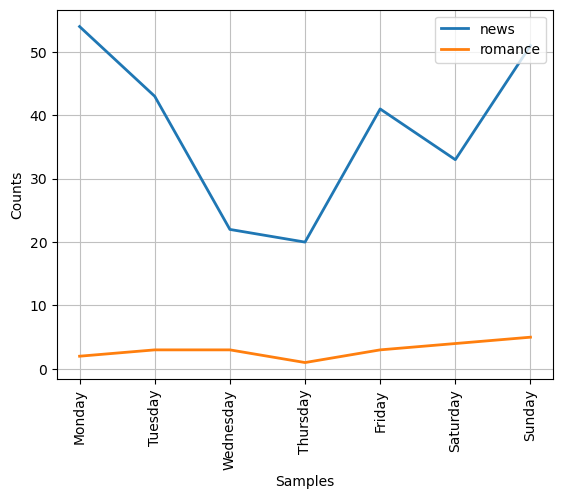

In [7]:
# ===============================
# NLTK Conditional Frequency Distributions Cheat Sheet
# ===============================
import nltk
from nltk.corpus import brown, genesis
from nltk import bigrams

# -------------------------------
# 1. Creating a CFD from (condition, event) pairs
# -------------------------------
# Example: words by genre (news, romance) in Brown Corpus
genre_word = [(genre, word)
              for genre in ['news','romance']
              for word in brown.words(categories=genre)]

cfd = nltk.ConditionalFreqDist(genre_word)

# Check conditions
print("Conditions:", cfd.conditions())  # ['news','romance']

# Access FreqDist for a condition
print("Most common in romance:", cfd['romance'].most_common(10))
print("Frequency of 'could' in romance:", cfd['romance']['could'])

# -------------------------------
# 2. Tabulate / Plot frequencies
# -------------------------------
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Tabulate counts for days of week in news and romance
cfd.tabulate(samples=days, conditions=['news','romance'])

# Plot counts
cfd.plot(samples=days, conditions=['news','romance'])

# -------------------------------
# 3. Bigram-based CFD and Random Text
# -------------------------------
# Use a corpus for bigrams (Genesis example)
text = genesis.words('english-kjv.txt')
bigram_pairs = list(bigrams(text))
cfd_bigrams = nltk.ConditionalFreqDist(bigram_pairs)

# Inspect a word’s followers
print("Words following 'living':", cfd_bigrams['living'])

# Simple random text generation from bigrams
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
    print()

generate_model(cfd_bigrams, 'living')

# -------------------------------
# 4. Useful CFD Methods
# -------------------------------
# cfd.conditions()        -> list of conditions
# cfd[condition]          -> FreqDist for that condition
# cfd[condition][sample]  -> frequency of sample under condition
# cfd.tabulate()           -> table of counts
# cfd.tabulate(samples, conditions) -> filtered table
# cfd.plot()               -> plot of counts
# cfd.plot(samples, conditions) -> filtered plot
# cfd1 < cfd2             -> compare frequency distributions


#  4 lexical resources
- A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions.
- Both of vocab and word_freq are simple lexical resources
- A lexical entry consists of a headword (also known as a lemma) along with additional information such as the part of speech and the sense definition
- Two distinct words having the same spelling are called homonyms.

## 4.1 
- NLTK has a corpora like the Words Corpus which is basically a wordlist
- there is also a corpus of stopwords which are high frequency words like the ,to ,also etc
- these lexical resources can be used for many different purposes

# 5: wordnet
WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. 

- a synset is a collection of synoymous words

- Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. 

In [8]:
## synsets and synonyms 
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [10]:
wn.synset('car.n.01').definition()
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [11]:
# get the lemmas 
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [16]:
# get the sysnset w/ the lemmas 
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [14]:
# get the name of the lemma 
wn.lemma('car.n.01.automobile').name() 

'automobile'

In [17]:
# unlikke motor car car is ambigous and has 5 synsets 
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [22]:
motorcar = wn.synset('car.n.01')
# hyponyms of motorcar  - specific instances of the word                  
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [24]:
# also can see hypernyms, general instances of a word
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [26]:
# lexical relations also incude mmeronyms and holonyms
wn.synset('tree.n.01').part_meronyms()

[Synset('stump.n.01'),
 Synset('crown.n.07'),
 Synset('burl.n.02'),
 Synset('trunk.n.01'),
 Synset('limb.n.02')]

In [27]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('sapwood.n.01'), Synset('heartwood.n.01')]

In [29]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

# 5.4 semantic similarity 
We have seen that synsets are linked by a complex network of lexical relations. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term like vehicle will match documents containing specific terms like limousine.



In [30]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [31]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [32]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [33]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

# 6   Summary
- A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, nltk.corpus.brown.
- Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.
- A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.
 - Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py extension, and accessed using an import statement.
- Python functions permit you to associate a name with a particular block of code, and re-use that code as often as necessary.
Some functions, known as "methods", are associated with an object and we give the object name followed by a period followed by the function, like this: x.funct(y), e.g., word.isalpha().
- To find out about some variable v, type help(v) in the Python interactive interpreter to read the help entry for this kind of object.
- WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.
- Some functions are not available by default, but must be accessed using Python's import statement.